In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
videos_df = pd.read_csv('/content/videos-stats.csv')
videos_df

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23-08-2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24-08-2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23-08-2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23-08-2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08-08-2022,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1789,Should You Learn Machine Learning?,AO6urf07KjE,14-06-2021,machine learning,10259.0,416.0,386360.0
1790,Todos podemos aprender Machine learning,7ClLKBUvmRk,08-10-2017,machine learning,2981.0,72.0,431421.0
1791,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,20-02-2020,machine learning,5198.0,443.0,226152.0
1792,What is Machine Learning?,f_uwKZIAeM0,11-01-2017,machine learning,NaN,NaN,NaN


In [3]:
videos_df.dropna(inplace=True)
videos_df

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23-08-2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24-08-2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23-08-2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23-08-2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08-08-2022,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1787,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,01-02-2022,machine learning,1861.0,184.0,37959.0
1788,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,11-05-2021,machine learning,9615.0,648.0,319957.0
1789,Should You Learn Machine Learning?,AO6urf07KjE,14-06-2021,machine learning,10259.0,416.0,386360.0
1790,Todos podemos aprender Machine learning,7ClLKBUvmRk,08-10-2017,machine learning,2981.0,72.0,431421.0


In [4]:
videos_df['Keyword'].unique()

array(['tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'interview',
       'history', 'literature', 'bed', 'trolling', 'asmr', 'music',
       'food', 'mukbang', 'reaction', 'lofi', 'animals', 'education',
       'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry', 'biology',
       'physics', 'computer science', 'nintendo', 'xbox', 'marvel',
       'movies', 'data science', 'game development', 'machine learning'],
      dtype=object)

In [5]:
pd.options.display.float_format = '{:20,.2f}'.format
top_10 = videos_df.groupby('Keyword')['Views'].mean().nlargest(10)
top_10

Keyword
animals           94,723,960.92
mrbeast           66,764,003.98
bed               53,893,228.61
music             29,364,893.26
history           15,047,130.12
cubes             15,038,739.34
mukbang           10,904,772.36
sports             8,601,204.73
how-to             7,809,284.92
business           7,236,354.52
Name: Views, dtype: float64

In [6]:
least_10 = videos_df.groupby('Keyword')['Views'].mean().nsmallest(10)
least_10

Keyword
news                         247,492.18
crypto                       404,608.22
gaming                       519,645.49
data science                 544,771.98
cnn                          554,240.38
reaction                     623,172.46
finance                      694,223.44
game development             724,688.54
literature                   863,021.24
sat                        1,065,868.71
Name: Views, dtype: float64

In [7]:
top_views = pd.DataFrame(top_10)
least_10 = pd.DataFrame(least_10)
top_views


,Views
Keyword,
animals,"94,723,960.92"
mrbeast,"66,764,003.98"
bed,"53,893,228.61"
music,"29,364,893.26"
history,"15,047,130.12"
cubes,"15,038,739.34"
mukbang,"10,904,772.36"
sports,"8,601,204.73"
how-to,"7,809,284.92"


In [8]:
top_views.index

Index(['animals', 'mrbeast', 'bed', 'music', 'history', 'cubes', 'mukbang',
       'sports', 'how-to', 'business'],
      dtype='object', name='Keyword')

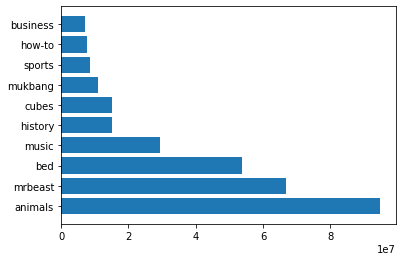

In [9]:
plt.barh(top_views.index, top_views['Views'])
plt.show()

In [10]:
filt = (videos_df['Keyword'] == 'music') | (videos_df['Keyword'] == 'tech')
df = videos_df[filt]
df

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23-08-2022,tech,"3,407.00",672.00,"135,612.00"
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24-08-2022,tech,"76,779.00","4,306.00","1,758,063.00"
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23-08-2022,tech,"63,825.00","3,338.00","1,564,007.00"
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23-08-2022,tech,"71,566.00","1,426.00","922,918.00"
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08-08-2022,tech,"96,513.00","5,155.00","1,855,644.00"
...,...,...,...,...,...,...,...
842,ዳርም የላት - New Ethiopian music 2022 - Nahom Mek...,QWbY0PDWHF0,20-08-2022,music,"7,219.00",314.00,"312,191.00"
843,OneRepublic - I Ain’t Worried (From “Top Gun: ...,mNEUkkoUoIA,13-05-2022,music,"731,644.00","8,894.00","45,665,114.00"
844,Piper Rockelle - Tea Party (Official Music Vid...,fkgTVsGLdws,20-08-2022,music,"50,488.00","8,741.00","1,090,694.00"
845,"Adie, Janine Berdin - Mahika (Lyrics)",hLzCb1wXaGg,11-07-2022,music,"12,595.00",216.00,"2,861,258.00"


In [11]:
tech_df = df[df['Keyword'] == 'tech']['Views']
music_df = df[df['Keyword'] == 'music']['Views']

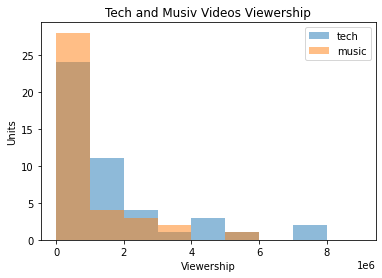

In [12]:
plt.hist(tech_df, alpha=0.5, bins=np.arange(0, 10000000, 1000000), label='tech')
plt.hist(music_df, alpha=0.5, bins=np.arange(0, 10000000, 1000000), label='music')
plt.title("Tech and Musiv Videos Viewership")
plt.ylabel("Units")
plt.xlabel("Viewership")
plt.legend()
plt.show()

In [13]:
avg_diff = tech_df.mean() - music_df.mean()
avg_diff

-27446086.323369566

In [15]:
shuffled = df.sample(94, replace = False)
shuffled


,Title,Video ID,Published At,Keyword,Likes,Comments,Views
828,The Truth About Their Relationship (Official M...,66ChoYhqVh4,25-11-2021,music,"365,971.00","34,419.00","35,490,831.00"
6,Tech Monopolies: Last Week Tonight with John O...,jXf04bhcjbg,13-06-2022,tech,"135,047.00","9,367.00","5,937,790.00"
10,Dope Tech: The Most Extreme Gaming Monitor!,MEiq0oCUb_8,15-08-2022,tech,"118,001.00","4,123.00","2,359,142.00"
811,"if someone asks you to play music, play this p...",#NAME?,08-02-2022,music,"94,131.00",920.00,"3,921,128.00"
845,"Adie, Janine Berdin - Mahika (Lyrics)",hLzCb1wXaGg,11-07-2022,music,"12,595.00",216.00,"2,861,258.00"
...,...,...,...,...,...,...,...
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23-08-2022,tech,"71,566.00","1,426.00","922,918.00"
844,Piper Rockelle - Tea Party (Official Music Vid...,fkgTVsGLdws,20-08-2022,music,"50,488.00","8,741.00","1,090,694.00"
7,I bought the STRANGEST TECH on the Internet.,2TqOmtTAMRY,07-08-2022,tech,"216,935.00","12,605.00","4,782,514.00"
801,Happy Morning Music - Positive Feelings and En...,u2IZJJna3yE,23-08-2022,music,109.00,16.00,"9,542.00"


In [16]:
shuffled_views = shuffled["Views"]
original_and_shuffled = df.assign(shuffled_views = shuffled_views.values)
original_and_shuffled

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,shuffled_views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23-08-2022,tech,"3,407.00",672.00,"135,612.00","35,490,831.00"
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24-08-2022,tech,"76,779.00","4,306.00","1,758,063.00","5,937,790.00"
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23-08-2022,tech,"63,825.00","3,338.00","1,564,007.00","2,359,142.00"
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23-08-2022,tech,"71,566.00","1,426.00","922,918.00","3,921,128.00"
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08-08-2022,tech,"96,513.00","5,155.00","1,855,644.00","2,861,258.00"
...,...,...,...,...,...,...,...,...
842,ዳርም የላት - New Ethiopian music 2022 - Nahom Mek...,QWbY0PDWHF0,20-08-2022,music,"7,219.00",314.00,"312,191.00","922,918.00"
843,OneRepublic - I Ain’t Worried (From “Top Gun: ...,mNEUkkoUoIA,13-05-2022,music,"731,644.00","8,894.00","45,665,114.00","1,090,694.00"
844,Piper Rockelle - Tea Party (Official Music Vid...,fkgTVsGLdws,20-08-2022,music,"50,488.00","8,741.00","1,090,694.00","4,782,514.00"
845,"Adie, Janine Berdin - Mahika (Lyrics)",hLzCb1wXaGg,11-07-2022,music,"12,595.00",216.00,"2,861,258.00","9,542.00"


In [17]:
viewership_difference = original_and_shuffled.groupby("Keyword")["shuffled_views"].mean()[1] - original_and_shuffled.groupby("Keyword")["shuffled_views"].mean()[0]
viewership_difference

-15234183.861413043

In [18]:
simulations = 10000
differences = np.zeros(10000)
for i in np.arange(simulations):
  shuffled = df.sample(94, replace = False)
  shuffled_views = shuffled["Views"]
  original_and_shuffled = df.assign(shuffled_views = shuffled_views.values)
  view_difference = original_and_shuffled.groupby("Keyword")["shuffled_views"].mean()[1] - original_and_shuffled.groupby("Keyword")["shuffled_views"].mean()[0]
  differences[i] = view_difference
differences 

array([ 14414628.6875    ,  22088513.07336957,  15353370.33061594, ...,
       -15568250.41032609,  24363111.57789855, -15084959.9682971 ])

In [19]:
diff_df = pd.DataFrame(differences, columns=["Viewership difference"])
diff_df

,Viewership difference
0,"14,414,628.69"
1,"22,088,513.07"
2,"15,353,370.33"
3,"-16,591,441.18"
4,"12,632,854.43"
...,...
9995,"11,534,846.65"
9996,"15,427,893.30"
9997,"-15,568,250.41"
9998,"24,363,111.58"


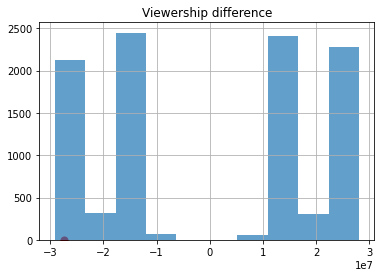

In [20]:
diff_df.hist(alpha=0.7)
plt.scatter(avg_diff, 0, s=50, c='r')
plt.show()

In [22]:
empirical_p = np.count_nonzero(differences <= avg_diff)/diff_df.size
print(f'Empirical p-value is {round(empirical_p, 2)*100}%')

Empirical p-value is 2.0%


Taking level of significance or α value as 0.05 or 5%, obtained empirical-p value is less than the α value, so we can reject the null hypothesis. So we can say that there is more evidence to support the alternative hypothesis, in other words, viewership for Tech videos tend to be lesser than that for music videos.